# Chapter 3. Data Transformation with dplyr

In [1]:
options(repr.plot.width = 8, repr.plot.height = 6)
library(lubridate)
library(magrittr)
library(tidyverse)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ lubridate::date()        masks base::date()
✖ tidyr::extract()         masks magrittr::extract()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base::intersect()
✖ dplyr::lag()             masks stats::lag()
✖ purrr::set_names()       masks magrittr::set_names()
✖ lubridate::setdiff()     masks base::setdiff()
✖ lubridate::union()       masks base::union()



## Introduction

In [2]:
summary(nycflights13::flights)
head(nycflights13::flights)
?nycflights13::flights

      year          month             day           dep_time    sched_dep_time
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1   Min.   : 106  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907   1st Qu.: 906  
 Median :2013   Median : 7.000   Median :16.00   Median :1401   Median :1359  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349   Mean   :1344  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744   3rd Qu.:1729  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400   Max.   :2359  
                                                 NA's   :8255                 
   dep_delay          arr_time    sched_arr_time   arr_delay       
 Min.   : -43.00   Min.   :   1   Min.   :   1   Min.   : -86.000  
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.:1124   1st Qu.: -17.000  
 Median :  -2.00   Median :1535   Median :1556   Median :  -5.000  
 Mean   :  12.64   Mean   :1502   Mean   :1536   Mean   :   6.895  
 3rd Qu.:  11.00   3rd Qu.:1

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


flights {nycflights13},R Documentation


In [3]:
summary(nycflights13::airlines)
head(nycflights13::airlines)
?nycflights13::airlines

   carrier              name          
 Length:16          Length:16         
 Class :character   Class :character  
 Mode  :character   Mode  :character  

carrier,name
<chr>,<chr>
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.


airlines {nycflights13},R Documentation


In [4]:
summary(nycflights13::airports)
head(nycflights13::airports)
?nycflights13::airports

     faa                name                lat             lon         
 Length:1458        Length:1458        Min.   :19.72   Min.   :-176.65  
 Class :character   Class :character   1st Qu.:34.26   1st Qu.:-119.19  
 Mode  :character   Mode  :character   Median :40.09   Median : -94.66  
                                       Mean   :41.65   Mean   :-103.39  
                                       3rd Qu.:45.07   3rd Qu.: -82.52  
                                       Max.   :72.27   Max.   : 174.11  
      alt                tz              dst               tzone          
 Min.   : -54.00   Min.   :-10.000   Length:1458        Length:1458       
 1st Qu.:  70.25   1st Qu.: -8.000   Class :character   Class :character  
 Median : 473.00   Median : -6.000   Mode  :character   Mode  :character  
 Mean   :1001.42   Mean   : -6.519                                        
 3rd Qu.:1062.50   3rd Qu.: -5.000                                        
 Max.   :9078.00   Max.   :  8.000     

faa,name,lat,lon,alt,tz,dst,tzone
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
04G,Lansdowne Airport,41.13047,-80.61958,1044,-5,A,America/New_York
06A,Moton Field Municipal Airport,32.46057,-85.68003,264,-6,A,America/Chicago
06C,Schaumburg Regional,41.98934,-88.10124,801,-6,A,America/Chicago
06N,Randall Airport,41.43191,-74.39156,523,-5,A,America/New_York
09J,Jekyll Island Airport,31.07447,-81.42778,11,-5,A,America/New_York
0A9,Elizabethton Municipal Airport,36.37122,-82.17342,1593,-5,A,America/New_York


airports {nycflights13},R Documentation


In [5]:
summary(nycflights13::planes)
head(nycflights13::planes)
?nycflights13::planes

   tailnum               year          type           manufacturer      
 Length:3322        Min.   :1956   Length:3322        Length:3322       
 Class :character   1st Qu.:1997   Class :character   Class :character  
 Mode  :character   Median :2001   Mode  :character   Mode  :character  
                    Mean   :2000                                        
                    3rd Qu.:2005                                        
                    Max.   :2013                                        
                    NA's   :70                                          
    model              engines          seats           speed      
 Length:3322        Min.   :1.000   Min.   :  2.0   Min.   : 90.0  
 Class :character   1st Qu.:2.000   1st Qu.:140.0   1st Qu.:107.5  
 Mode  :character   Median :2.000   Median :149.0   Median :162.0  
                    Mean   :1.995   Mean   :154.3   Mean   :236.8  
                    3rd Qu.:2.000   3rd Qu.:182.0   3rd Qu.:432.0  
        

tailnum,year,type,manufacturer,model,engines,seats,speed,engine
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>
N10156,2004,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NA,Turbo-fan
N102UW,1998,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N103US,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N104UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan
N10575,2002,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NA,Turbo-fan
N105UW,1999,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NA,Turbo-fan


planes {nycflights13},R Documentation


In [6]:
summary(nycflights13::weather)
head(nycflights13::weather)
?nycflights13::weather

    origin               year          month             day       
 Length:26115       Min.   :2013   Min.   : 1.000   Min.   : 1.00  
 Class :character   1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00  
 Mode  :character   Median :2013   Median : 7.000   Median :16.00  
                    Mean   :2013   Mean   : 6.504   Mean   :15.68  
                    3rd Qu.:2013   3rd Qu.: 9.000   3rd Qu.:23.00  
                    Max.   :2013   Max.   :12.000   Max.   :31.00  
                                                                   
      hour            temp             dewp           humid       
 Min.   : 0.00   Min.   : 10.94   Min.   :-9.94   Min.   : 12.74  
 1st Qu.: 6.00   1st Qu.: 39.92   1st Qu.:26.06   1st Qu.: 47.05  
 Median :11.00   Median : 55.40   Median :42.08   Median : 61.79  
 Mean   :11.49   Mean   : 55.26   Mean   :41.44   Mean   : 62.53  
 3rd Qu.:17.00   3rd Qu.: 69.98   3rd Qu.:57.92   3rd Qu.: 78.79  
 Max.   :23.00   Max.   :100.04   Max.   :78.08   Max.

origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
EWR,2013,1,1,1,39.02,26.06,59.37,270,10.35702,NA,0,1012.0,10,2013-01-01 01:00:00
EWR,2013,1,1,2,39.02,26.96,61.63,250,8.05546,NA,0,1012.3,10,2013-01-01 02:00:00
EWR,2013,1,1,3,39.02,28.04,64.43,240,11.50780,NA,0,1012.5,10,2013-01-01 03:00:00
EWR,2013,1,1,4,39.92,28.04,62.21,250,12.65858,NA,0,1012.2,10,2013-01-01 04:00:00
EWR,2013,1,1,5,39.02,28.04,64.43,260,12.65858,NA,0,1011.9,10,2013-01-01 05:00:00
EWR,2013,1,1,6,37.94,28.04,67.21,240,11.50780,NA,0,1012.4,10,2013-01-01 06:00:00


weather {nycflights13},R Documentation


In [7]:
flights_utc <- bind_cols(
  select(nycflights13::flights, -matches("year|month|day|hour|minute|dep_time|arr_time|origin|dest")),

  left_join(
    select(nycflights13::flights, matches("year|month|day|dep_time|origin")),
    select(nycflights13::airports, matches("faa|name|tzone")),
    by = c("origin" = "faa")
  ) %>% transmute(
    dep_time = with_tz(make_datetime(year, month, day, dep_time %/% 100, dep_time %% 100, tz = tzone), "UTC"),
    origin_faa = origin,
    origin_name = name,
    sched_dep_time = with_tz(make_datetime(year, month, day, sched_dep_time %/% 100, sched_dep_time %% 100, tz = tzone), "UTC"),
  ),

  left_join(
    select(nycflights13::flights, matches("year|month|day|arr_time|dest")),
    select(nycflights13::airports, matches("faa|name|tzone")),
    by = c("dest" = "faa")
  ) %>% transmute(
    arr_time = with_tz(make_datetime(year, month, day, arr_time %/% 100, arr_time %% 100, tz = tzone), "UTC"),
    dest_faa = dest,
    dest_name = name,
    sched_arr_time = with_tz(make_datetime(year, month, day, sched_arr_time %/% 100, sched_arr_time %% 100, tz = tzone), "UTC"),
  )
) %>%
  left_join(select(nycflights13::airlines, carrier, carrier_name = name), by = "carrier") %>%
  select(sort(colnames(.)))
head(flights_utc)

air_time,arr_delay,arr_time,carrier,carrier_name,dep_delay,dep_time,dest_faa,dest_name,distance,flight,origin_faa,origin_name,sched_arr_time,sched_dep_time,tailnum
<dbl>,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<dttm>,<dttm>,<chr>
227,11,2013-01-01 14:30:00,UA,United Air Lines Inc.,2,2013-01-01 10:17:00,IAH,George Bush Intercontinental,1400,1545,EWR,Newark Liberty Intl,2013-01-01 14:19:00,2013-01-01 10:15:00,N14228
227,20,2013-01-01 14:50:00,UA,United Air Lines Inc.,4,2013-01-01 10:33:00,IAH,George Bush Intercontinental,1416,1714,LGA,La Guardia,2013-01-01 14:30:00,2013-01-01 10:29:00,N24211
160,33,2013-01-01 15:23:00,AA,American Airlines Inc.,2,2013-01-01 10:42:00,MIA,Miami Intl,1089,1141,JFK,John F Kennedy Intl,2013-01-01 14:50:00,2013-01-01 10:40:00,N619AA
183,-18,2013-01-01 16:04:00,B6,JetBlue Airways,-1,2013-01-01 10:44:00,BQN,NA,1576,725,JFK,John F Kennedy Intl,2013-01-01 16:22:00,2013-01-01 10:45:00,N804JB
116,-25,2013-01-01 14:12:00,DL,Delta Air Lines Inc.,-6,2013-01-01 10:54:00,ATL,Hartsfield Jackson Atlanta Intl,762,461,LGA,La Guardia,2013-01-01 14:37:00,2013-01-01 11:00:00,N668DN
150,12,2013-01-01 13:40:00,UA,United Air Lines Inc.,-4,2013-01-01 10:54:00,ORD,Chicago Ohare Intl,719,1696,EWR,Newark Liberty Intl,2013-01-01 13:28:00,2013-01-01 10:58:00,N39463


## Filter Rows with filter()

In [8]:
flights_utc %>%
  filter(month(sched_dep_time) == 1, day(sched_dep_time) == 1) %>%
  print

# A tibble: 797 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      227        11 2013-01-01 14:30:00 UA      United Air …         2
 2      227        20 2013-01-01 14:50:00 UA      United Air …         4
 3      160        33 2013-01-01 15:23:00 AA      American Ai…         2
 4      183       -18 2013-01-01 16:04:00 B6      JetBlue Air…        -1
 5      116       -25 2013-01-01 14:12:00 DL      Delta Air L…        -6
 6      150        12 2013-01-01 13:40:00 UA      United Air …        -4
 7      158        19 2013-01-01 15:13:00 B6      JetBlue Air…        -5
 8       53       -14 2013-01-01 13:09:00 EV      ExpressJet …        -3
 9      140        -8 2013-01-01 14:38:00 B6      JetBlue Air…        -3
10      138         8 2013-01-01 13:53:00 AA      American Ai…        -2
# … with 787 more rows, and 10 more variables: dep_time <dttm>, dest_faa <chr>,
#   dest_name <chr>, di

In [9]:
c(sqrt(2)^2 == 2, 1 / 49 * 49 == 1)
c(near(sqrt(2)^2, 2), near(1 / 49 * 49, 1))

[1] FALSE FALSE

[1] TRUE TRUE

<img width="800" src="https://web.archive.org/web/20201226192132if_/https://www.oreilly.com/library/view/r-for-data/9781491910382/assets/rfds_03in01.png" />

In [10]:
flights_utc %>%
  filter(month(sched_dep_time) %in% c(11, 12)) %>%
  print

# A tibble: 55,391 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1       49        -9 2013-11-01 02:25:00 9E      Endeavor Ai…        -6
 2       59        -1 2013-11-01 02:18:00 US      US Airways …        -5
 3      255        -5 2013-11-01 03:58:00 B6      JetBlue Air…        -5
 4      148        16 2013-11-01 04:24:00 B6      JetBlue Air…        -7
 5      151       -12 2013-11-01 02:50:00 EV      ExpressJet …       -10
 6      199       -13 2013-11-01 03:37:00 UA      United Air …        -2
 7      314        10 2013-11-01 04:25:00 VX      Virgin Amer…         0
 8       47        16 2013-11-01 02:38:00 B6      JetBlue Air…       -10
 9       39        -7 2013-11-01 02:37:00 9E      Endeavor Ai…       -16
10      129        11 2013-11-01 04:03:00 B6      JetBlue Air…         3
# … with 55,381 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <ch

### Exercises

1. Find all flights that:
    1. Had an arrival delay of two or more hours
    1. Flew to Houston (`IAH` or `HOU`)
    1. Were operated by United, American, or Delta
    1. Departed in summer (July, August, and September)
    1. Arrived more than two hours late, but didn’t leave late
    1. Were delayed by at least an hour, but made up over 30 minutes in flight
    1. Departed between midnight and 6 a.m. (inclusive)
1. Another useful **dplyr** filtering helper is `between()`. What does it do? Can you use it to simplify the code needed to answer the previous challenges?
1. How many flights have a missing `dep_time`? What other variables are missing? What might these rows represent?
1. Why is `NA ^ 0` not missing? Why is `NA | TRUE` not missing? Why is `FALSE & NA` not missing? Can you figure out the general rule? (`NA * 0` is a tricky counterexample!)

In [11]:
# 1.A.
flights_utc %>%
  filter(dminutes(arr_delay) > dhours(2)) %>%
  print

# A tibble: 10,034 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      118       137 2013-01-01 16:47:00 MQ      Envoy Air          101
 2       41       851 2013-01-01 16:01:00 MQ      Envoy Air          853
 3       37       123 2013-01-01 16:56:00 UA      United Air …       144
 4      248       145 2013-01-01 20:47:00 UA      United Air …       134
 5       63       127 2013-01-01 22:38:00 EV      ExpressJet …       115
 6      152       125 2013-01-02 00:31:00 B6      JetBlue Air…       105
 7      234       136 2013-01-02 01:12:00 EV      ExpressJet …        64
 8       53       123 2013-01-01 23:18:00 EV      ExpressJet …       119
 9      119       123 2013-01-02 02:28:00 EV      ExpressJet …        62
10      154       138 2013-01-02 02:08:00 MQ      Envoy Air          103
# … with 10,024 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <ch

In [12]:
# 1.B.
flights_utc %>%
  filter(dest_faa %in% c("IAH", "HOU")) %>%
  print

# A tibble: 9,313 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      227        11 2013-01-01 14:30:00 UA      United Air …         2
 2      227        20 2013-01-01 14:50:00 UA      United Air …         4
 3      229         1 2013-01-01 15:33:00 UA      United Air …        -4
 4      238         3 2013-01-01 16:41:00 UA      United Air …        -4
 5      249        26 2013-01-01 17:04:00 UA      United Air …         0
 6      233         9 2013-01-01 18:28:00 UA      United Air …         0
 7      237        11 2013-01-01 19:50:00 UA      United Air …         2
 8      229         1 2013-01-01 19:52:00 UA      United Air …        -1
 9      248       145 2013-01-01 20:47:00 UA      United Air …       134
10      221        -2 2013-01-01 21:03:00 UA      United Air …         5
# … with 9,303 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <chr>

In [13]:
# 1.C.
flights_utc %>%
  filter(grepl("United|American|Delta", carrier_name)) %>%
  print

# A tibble: 139,504 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      227        11 2013-01-01 14:30:00 UA      United Air …         2
 2      227        20 2013-01-01 14:50:00 UA      United Air …         4
 3      160        33 2013-01-01 15:23:00 AA      American Ai…         2
 4      116       -25 2013-01-01 14:12:00 DL      Delta Air L…        -6
 5      150        12 2013-01-01 13:40:00 UA      United Air …        -4
 6      138         8 2013-01-01 13:53:00 AA      American Ai…        -2
 7      345         7 2013-01-01 15:24:00 UA      United Air …        -2
 8      361       -14 2013-01-01 15:23:00 UA      United Air …        -2
 9      257        31 2013-01-01 15:41:00 AA      American Ai…        -1
10      337        -8 2013-01-01 14:54:00 UA      United Air …        -1
# … with 139,494 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <

In [14]:
# 1.D.
flights_utc %>%
  filter(between(month(dep_time), 7, 9)) %>%
  print

# A tibble: 84,514 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      301        26 2013-07-01 03:56:00 UA      United Air …        41
 2       41         7 2013-07-01 02:36:00 B6      JetBlue Air…         3
 3      327        68 2013-07-01 04:24:00 B6      JetBlue Air…        70
 4       80        75 2013-07-01 02:48:00 DL      Delta Air L…        95
 5       58       103 2013-07-01 02:22:00 DL      Delta Air L…       126
 6      138       199 2013-07-01 02:49:00 DL      Delta Air L…       231
 7      316        19 2013-07-01 04:14:00 B6      JetBlue Air…        30
 8      193        37 2013-07-01 04:47:00 UA      United Air …         1
 9       68       170 2013-07-01 02:55:00 B6      JetBlue Air…       183
10      290        61 2013-07-01 03:48:00 B6      JetBlue Air…        74
# … with 84,504 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <ch

In [15]:
# 1.E.
flights_utc %>%
  filter(dep_delay < 1, dminutes(arr_delay) > dhours(2)) %>%
  print

# A tibble: 29 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      135       124 2013-01-27 23:54:00 MQ      Envoy Air           -1
 2      117       130 2013-10-07 22:36:00 EV      ExpressJet …         0
 3      192       124 2013-10-07 23:58:00 AA      American Ai…        -2
 4      225       122 2013-10-16 17:58:00 B6      JetBlue Air…        -3
 5      336       194 2013-11-01 18:29:00 VX      Virgin Amer…        -2
 6      386       140 2013-03-18 05:39:00 UA      United Air …        -3
 7      130       124 2013-04-18 01:49:00 MQ      Envoy Air           -5
 8      234       179 2013-04-18 16:49:00 AA      American Ai…        -2
 9      230       143 2013-04-18 17:13:00 AA      American Ai…        -5
10       90       127 2013-05-23 03:17:00 MQ      Envoy Air           -3
# … with 19 more rows, and 10 more variables: dep_time <dttm>, dest_faa <chr>,
#   dest_name <chr>, dist

In [16]:
# 1.F.
flights_utc %>%
  filter(dminutes(dep_delay) > dhours(), dep_delay - arr_delay > 30) %>%
  print

# A tibble: 1,819 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      146       246 2013-01-01 06:46:00 AA      American Ai…       285
 2      290        73 2013-01-01 07:31:00 B6      JetBlue Air…       116
 3      320       128 2013-01-04 00:03:00 UA      United Air …       162
 4      239        66 2013-01-04 02:56:00 AA      American Ai…        99
 5      314        28 2013-01-04 03:48:00 AA      American Ai…        65
 6      274        67 2013-01-04 04:46:00 UA      United Air …       102
 7      319         1 2013-01-04 04:28:00 B6      JetBlue Air…        65
 8       90       141 2013-01-03 06:45:00 9E      Endeavor Ai…       177
 9      239       105 2013-01-05 03:35:00 AA      American Ai…       137
10      327        97 2013-01-05 04:57:00 AA      American Ai…       145
# … with 1,809 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <chr>

In [17]:
# 1.G.
flights_utc %>%
  filter(between(hour(dep_time), 0, 6)) %>%
  print

# A tibble: 43,150 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      330       -15 2013-01-02 04:12:00 B6      JetBlue Air…        15
 2      133       -48 2013-01-02 03:39:00 DL      Delta Air L…        -1
 3      150       -11 2013-01-02 03:57:00 UA      United Air …        -1
 4      361        10 2013-01-02 05:11:00 DL      Delta Air L…         5
 5      159       -33 2013-01-02 04:11:00 DL      Delta Air L…        -9
 6      291         2 2013-01-02 04:39:00 B6      JetBlue Air…        -3
 7      323       -12 2013-01-02 04:12:00 DL      Delta Air L…        -1
 8      159        40 2013-01-02 03:26:00 EV      ExpressJet …         1
 9      141        19 2013-01-02 03:26:00 9E      Endeavor Ai…         0
10      107        15 2013-01-02 03:18:00 US      US Airways …        15
# … with 43,140 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <ch

In [18]:
# 3.
flights_utc %>% filter(is.na(dep_time)) %>% print

# A tibble: 8,255 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1       NA        NA NA                  EV      ExpressJet …        NA
 2       NA        NA NA                  AA      American Ai…        NA
 3       NA        NA NA                  AA      American Ai…        NA
 4       NA        NA NA                  B6      JetBlue Air…        NA
 5       NA        NA NA                  EV      ExpressJet …        NA
 6       NA        NA NA                  EV      ExpressJet …        NA
 7       NA        NA NA                  EV      ExpressJet …        NA
 8       NA        NA NA                  EV      ExpressJet …        NA
 9       NA        NA NA                  EV      ExpressJet …        NA
10       NA        NA NA                  AA      American Ai…        NA
# … with 8,245 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <chr>

In [19]:
# 4.
c(NA^0, NA | TRUE, FALSE & NA, NA * 0)

[1]  1  1  0 NA

From `` ?`^` ``:
> 1 ^ y and y ^ 0 are 1, always.

## Arrange Rows with arrange()

### Exercises

1. How could you use `arrange()` to sort all missing values to the start? (Hint: use `is.na()`.)
1. Sort `flights` to find the most delayed flights. Find the flights that left earliest.
1. Sort `flights` to find the fastest flights.
1. Which `flights` traveled the longest? Which traveled the shortest?

In [20]:
# 1.
flights_utc %>%
  arrange(!is.na(arr_delay), desc(arr_delay)) %>%
  print

# A tibble: 336,776 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1       NA        NA 2013-01-02 01:34:00 MQ      Envoy Air           -5
 2       NA        NA 2013-01-02 02:02:00 EV      ExpressJet …        29
 3       NA        NA 2013-01-02 03:58:00 MQ      Envoy Air           -5
 4       NA        NA 2013-01-02 04:51:00 UA      United Air …        29
 5       NA        NA 2013-01-01 06:29:00 9E      Endeavor Ai…        59
 6       NA        NA 2013-01-02 05:58:00 EV      ExpressJet …        22
 7       NA        NA NA                  EV      ExpressJet …        46
 8       NA        NA NA                  EV      ExpressJet …        NA
 9       NA        NA NA                  AA      American Ai…        NA
10       NA        NA NA                  AA      American Ai…        NA
# … with 336,766 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <

In [21]:
# 2.
flights_utc %>%
  arrange(desc(arr_delay)) %>%
  print
flights_utc %>%
  arrange(dep_delay) %>%
  print

# A tibble: 336,776 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      640      1272 2013-01-09 18:42:00 HA      Hawaiian Ai…      1301
 2       74      1127 2013-06-15 21:07:00 MQ      Envoy Air         1137
 3      111      1109 2013-01-10 18:39:00 MQ      Envoy Air         1126
 4      354      1007 2013-09-20 19:57:00 AA      American Ai…      1014
 5       96       989 2013-07-22 15:44:00 MQ      Envoy Air         1005
 6      139       931 2013-04-10 18:42:00 DL      Delta Air L…       960
 7      167       915 2013-03-17 06:35:00 DL      Delta Air L…       911
 8      109       895 2013-07-22 06:21:00 DL      Delta Air L…       898
 9      149       878 2013-12-05 16:58:00 AA      American Ai…       896
10      112       875 2013-05-03 17:50:00 MQ      Envoy Air          878
# … with 336,766 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <

In [22]:
# 3.
flights_utc %>%
  arrange(air_time) %>%
  print

# A tibble: 336,776 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1       20        31 2013-01-16 20:42:00 EV      ExpressJet …        40
 2       20        -6 2013-04-13 11:22:00 EV      ExpressJet …        10
 3       21        27 2013-12-06 16:21:00 EV      ExpressJet …        31
 4       21        23 2013-02-04 04:47:00 EV      ExpressJet …        24
 5       21       -29 2013-02-05 19:42:00 EV      ExpressJet …       -12
 6       21       -14 2013-02-13 04:11:00 EV      ExpressJet …        -7
 7       21       -21 2013-03-02 21:47:00 US      US Airways …       -10
 8       21        35 2013-03-09 03:31:00 9E      Endeavor Ai…        51
 9       21        67 2013-03-18 20:33:00 EV      ExpressJet …        87
10       21        19 2013-03-20 04:05:00 EV      ExpressJet …        41
# … with 336,766 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <

In [23]:
# 4.
flights_utc %>%
  arrange(desc(distance)) %>%
  print
flights_utc %>%
  arrange(distance) %>%
  print

# A tibble: 336,776 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      659       -14 2013-01-01 21:16:00 HA      Hawaiian Ai…        -3
 2      638        -5 2013-01-02 21:25:00 HA      Hawaiian Ai…         9
 3      616       -26 2013-01-03 21:04:00 HA      Hawaiian Ai…        14
 4      639       -14 2013-01-04 21:16:00 HA      Hawaiian Ai…         0
 5      635       -11 2013-01-05 21:19:00 HA      Hawaiian Ai…        -2
 6      611        28 2013-01-06 21:58:00 HA      Hawaiian Ai…        79
 7      612        50 2013-01-07 22:20:00 HA      Hawaiian Ai…       102
 8      645       -26 2013-01-08 21:04:00 HA      Hawaiian Ai…         1
 9      640      1272 2013-01-09 18:42:00 HA      Hawaiian Ai…      1301
10      633       -41 2013-01-10 20:49:00 HA      Hawaiian Ai…        -1
# … with 336,766 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <

## Select Columns with select()

### Exercises

1. Brainstorm as many ways as possible to select `dep_time`, `dep_delay`, `arr_time`, and `arr_delay` from flights.
1. What happens if you include the name of a variable multiple times in a `select()` call?
1. What does the `one_of()` function do? Why might it be helpful in conjunction with this vector?

    ```r
    vars <- c(
      "year", "month", "day", "dep_delay", "arr_delay"
    )
    ```

1. Does the result of running the following code surprise you? How do the select helpers deal with case by default? How can you change that default?

    ```r
    select(flights, contains("TIME"))
    ```

In [24]:
# 1.
flights_utc %>%
  select(matches("^arr|^dep")) %>%
  print

# A tibble: 336,776 x 4
   arr_delay arr_time            dep_delay dep_time           
       <dbl> <dttm>                  <dbl> <dttm>             
 1        11 2013-01-01 14:30:00         2 2013-01-01 10:17:00
 2        20 2013-01-01 14:50:00         4 2013-01-01 10:33:00
 3        33 2013-01-01 15:23:00         2 2013-01-01 10:42:00
 4       -18 2013-01-01 16:04:00        -1 2013-01-01 10:44:00
 5       -25 2013-01-01 14:12:00        -6 2013-01-01 10:54:00
 6        12 2013-01-01 13:40:00        -4 2013-01-01 10:54:00
 7        19 2013-01-01 15:13:00        -5 2013-01-01 10:55:00
 8       -14 2013-01-01 13:09:00        -3 2013-01-01 10:57:00
 9        -8 2013-01-01 14:38:00        -3 2013-01-01 10:57:00
10         8 2013-01-01 13:53:00        -2 2013-01-01 10:58:00
# … with 336,766 more rows


In [25]:
# 3.
flights_utc %>%
  select(any_of(c("year", "month", "day", "dep_delay", "arr_delay"))) %>%
  print

# A tibble: 336,776 x 2
   dep_delay arr_delay
       <dbl>     <dbl>
 1         2        11
 2         4        20
 3         2        33
 4        -1       -18
 5        -6       -25
 6        -4        12
 7        -5        19
 8        -3       -14
 9        -3        -8
10        -2         8
# … with 336,766 more rows


In [26]:
# 4.
flights_utc %>%
  select(contains("TIME", ignore.case = TRUE)) %>%
  print

# A tibble: 336,776 x 5
   air_time arr_time            dep_time            sched_arr_time     
      <dbl> <dttm>              <dttm>              <dttm>             
 1      227 2013-01-01 14:30:00 2013-01-01 10:17:00 2013-01-01 14:19:00
 2      227 2013-01-01 14:50:00 2013-01-01 10:33:00 2013-01-01 14:30:00
 3      160 2013-01-01 15:23:00 2013-01-01 10:42:00 2013-01-01 14:50:00
 4      183 2013-01-01 16:04:00 2013-01-01 10:44:00 2013-01-01 16:22:00
 5      116 2013-01-01 14:12:00 2013-01-01 10:54:00 2013-01-01 14:37:00
 6      150 2013-01-01 13:40:00 2013-01-01 10:54:00 2013-01-01 13:28:00
 7      158 2013-01-01 15:13:00 2013-01-01 10:55:00 2013-01-01 14:54:00
 8       53 2013-01-01 13:09:00 2013-01-01 10:57:00 2013-01-01 13:23:00
 9      140 2013-01-01 14:38:00 2013-01-01 10:57:00 2013-01-01 14:46:00
10      138 2013-01-01 13:53:00 2013-01-01 10:58:00 2013-01-01 13:45:00
# … with 336,766 more rows, and 1 more variable: sched_dep_time <dttm>


## Add New Variables with mutate()

> *Arithmetic operators `+, -, *, /, ^`*. These are all vectorized, using the so-called “recycling rules.” If one parameter is shorter than the other, it will be automatically extended to be the same length.

> *Logs `log()`, `log2()`, `log10()`*. Logarithms are an incredibly useful transformation for dealing with data that ranges across multiple orders of magnitude. They also convert multiplicative relationships to additive. All else being equal, I recommend using `log2()` because it’s easy to interpret: a difference of 1 on the log scale corresponds to doubling on the original scale and a difference of –1 corresponds to halving.

> *Offsets*. `lead()` and `lag()` allow you to refer to leading or lagging values. This allows you to compute running differences (e.g., `x - lag(x)`) or find when values change (`x != lag(x)`).

> *Cumulative and rolling aggregates*. R provides functions for running sums, products, mins, and maxes: `cumsum()`, `cumprod()`, `cummin()`, `cummax()`; and **dplyr** provides `cummean()` for cumulative means. If you need rolling aggregates (i.e., a sum computed over a rolling window), try the **RcppRoll** package.

> *Ranking*. There are a number of ranking functions, but you should start with `min_rank()`. It does the most usual type of ranking (e.g., first, second, third, fourth). If `min_rank()` doesn’t do what you need, look at the variants `row_number()`, `dense_rank()`, `percent_rank()`, `cume_dist()`, and `ntile()`.

In [27]:
y <- c(1, 2, 2, NA, 3, 4)
min_rank(y)
min_rank(desc(y))
row_number(y)
dense_rank(y)
percent_rank(y)
cume_dist(y)

[1]  1  2  2 NA  4  5

[1]  5  3  3 NA  2  1

[1]  1  2  3 NA  4  5

[1]  1  2  2 NA  3  4

[1] 0.00 0.25 0.25   NA 0.75 1.00

[1] 0.2 0.6 0.6  NA 0.8 1.0

### Exercises

1. Currently `dep_time` and `sched_dep_time` are convenient to look at, but hard to compute with because they’re not really continuous numbers. Convert them to a more convenient representation of number of minutes since midnight.
1. Compare `air_time` with `arr_time - dep_time`. What do you expect to see? What do you see? What do you need to do to fix it?
1. Compare `dep_time`, `sched_dep_time`, and `dep_delay`. How would you expect those three numbers to be related?
1. Find the 10 most delayed flights using a ranking function. How do you want to handle ties? Carefully read the documentation for `min_rank()`.
1. What does `1:3 + 1:10` return? Why?
1. What trigonometric functions does R provide?

In [28]:
# 1.
flights_utc %>%
  transmute(
    dep_time = dep_time,
    dep_time_midnight = (dep_time - floor_date(dep_time, unit = "day")) / dminutes(),
    sched_dep_time = sched_dep_time,
    sched_dep_time_midnight = (sched_dep_time - floor_date(sched_dep_time, unit = "day")) / dminutes(),
  ) %>%
  print

# A tibble: 336,776 x 4
   dep_time            dep_time_midnight sched_dep_time      sched_dep_time_mid…
   <dttm>                          <dbl> <dttm>                            <dbl>
 1 2013-01-01 10:17:00               617 2013-01-01 10:15:00                 615
 2 2013-01-01 10:33:00               633 2013-01-01 10:29:00                 629
 3 2013-01-01 10:42:00               642 2013-01-01 10:40:00                 640
 4 2013-01-01 10:44:00               644 2013-01-01 10:45:00                 645
 5 2013-01-01 10:54:00               654 2013-01-01 11:00:00                 660
 6 2013-01-01 10:54:00               654 2013-01-01 10:58:00                 658
 7 2013-01-01 10:55:00               655 2013-01-01 11:00:00                 660
 8 2013-01-01 10:57:00               657 2013-01-01 11:00:00                 660
 9 2013-01-01 10:57:00               657 2013-01-01 11:00:00                 660
10 2013-01-01 10:58:00               658 2013-01-01 11:00:00                 660
# … 

In [29]:
# 2.
flights_utc %>%
  transmute(
    sched_dep_time = sched_dep_time,
    sched_arr_time = sched_arr_time,
    sched_air_time = (sched_arr_time - sched_dep_time) / dminutes(),
    dep_time = dep_time,
    arr_time = arr_time,
    air_time = air_time,
    air_time_computed = (arr_time - dep_time) / dminutes(),
    ratio = air_time_computed / air_time
  ) %>%
  head(10)

sched_dep_time,sched_arr_time,sched_air_time,dep_time,arr_time,air_time,air_time_computed,ratio
<dttm>,<dttm>,<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>
2013-01-01 10:15:00,2013-01-01 14:19:00,244,2013-01-01 10:17:00,2013-01-01 14:30:00,227,253,1.114537
2013-01-01 10:29:00,2013-01-01 14:30:00,241,2013-01-01 10:33:00,2013-01-01 14:50:00,227,257,1.132159
2013-01-01 10:40:00,2013-01-01 14:50:00,250,2013-01-01 10:42:00,2013-01-01 15:23:00,160,281,1.756250
2013-01-01 10:45:00,2013-01-01 16:22:00,337,2013-01-01 10:44:00,2013-01-01 16:04:00,183,320,1.748634
2013-01-01 11:00:00,2013-01-01 14:37:00,217,2013-01-01 10:54:00,2013-01-01 14:12:00,116,198,1.706897
2013-01-01 10:58:00,2013-01-01 13:28:00,150,2013-01-01 10:54:00,2013-01-01 13:40:00,150,166,1.106667
2013-01-01 11:00:00,2013-01-01 14:54:00,234,2013-01-01 10:55:00,2013-01-01 15:13:00,158,258,1.632911
2013-01-01 11:00:00,2013-01-01 13:23:00,143,2013-01-01 10:57:00,2013-01-01 13:09:00,53,132,2.490566
2013-01-01 11:00:00,2013-01-01 14:46:00,226,2013-01-01 10:57:00,2013-01-01 14:38:00,140,221,1.578571


In [30]:
# 3.
flights_utc %>%
  transmute(
    sched_dep_time = sched_dep_time,
    dep_time = dep_time,
    dep_delay = dep_delay,
    diff = dep_time - (sched_dep_time + dminutes(dep_delay))
  ) %>%
  filter(diff != dseconds(0)) %>%
  print

# A tibble: 1,207 x 4
   sched_dep_time      dep_time            dep_delay diff       
   <dttm>              <dttm>                  <dbl> <drtn>     
 1 2013-01-01 23:35:00 2013-01-01 13:48:00       853 -86400 secs
 2 2013-01-03 04:59:00 2013-01-02 05:42:00        43 -86400 secs
 3 2013-01-03 03:50:00 2013-01-02 06:26:00       156 -86400 secs
 4 2013-01-04 04:59:00 2013-01-03 05:32:00        33 -86400 secs
 5 2013-01-04 02:45:00 2013-01-03 05:50:00       185 -86400 secs
 6 2013-01-04 04:59:00 2013-01-03 07:35:00       156 -86400 secs
 7 2013-01-05 04:59:00 2013-01-04 05:25:00        26 -86400 secs
 8 2013-01-05 03:45:00 2013-01-04 06:06:00       141 -86400 secs
 9 2013-01-06 04:59:00 2013-01-05 05:14:00        15 -86400 secs
10 2013-01-06 03:30:00 2013-01-05 05:37:00       127 -86400 secs
# … with 1,197 more rows


In [31]:
# 4.
flights_utc %>%
  mutate(most_delayed = min_rank(desc(dep_delay))) %>%
  arrange(most_delayed) %>%
  head(10)

air_time,arr_delay,arr_time,carrier,carrier_name,dep_delay,dep_time,dest_faa,dest_name,distance,flight,origin_faa,origin_name,sched_arr_time,sched_dep_time,tailnum,most_delayed
<dbl>,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<dttm>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<int>
640,1272,2013-01-09 18:42:00,HA,Hawaiian Airlines Inc.,1301,2013-01-09 11:41:00,HNL,Honolulu Intl,4983,51,JFK,John F Kennedy Intl,2013-01-09 21:30:00,2013-01-09 14:00:00,N384HA,1
74,1127,2013-06-15 21:07:00,MQ,Envoy Air,1137,2013-06-15 18:32:00,CMH,Port Columbus Intl,483,3535,JFK,John F Kennedy Intl,2013-06-16 02:20:00,2013-06-15 23:35:00,N504MQ,2
111,1109,2013-01-10 18:39:00,MQ,Envoy Air,1126,2013-01-10 16:21:00,ORD,Chicago Ohare Intl,719,3695,EWR,Newark Liberty Intl,2013-01-11 00:10:00,2013-01-10 21:35:00,N517MQ,3
354,1007,2013-09-20 19:57:00,AA,American Airlines Inc.,1014,2013-09-20 15:39:00,SFO,San Francisco Intl,2586,177,JFK,John F Kennedy Intl,2013-09-21 03:10:00,2013-09-20 22:45:00,N338AA,4
96,989,2013-07-22 15:44:00,MQ,Envoy Air,1005,2013-07-22 12:45:00,CVG,Cincinnati Northern Kentucky Intl,589,3075,JFK,John F Kennedy Intl,2013-07-22 23:15:00,2013-07-22 20:00:00,N665MQ,5
139,931,2013-04-10 18:42:00,DL,Delta Air Lines Inc.,960,2013-04-10 15:00:00,TPA,Tampa Intl,1005,2391,JFK,John F Kennedy Intl,2013-04-11 03:11:00,2013-04-10 23:00:00,N959DL,6
167,915,2013-03-17 06:35:00,DL,Delta Air Lines Inc.,911,2013-03-18 03:21:00,MSP,Minneapolis St Paul Intl,1020,2119,LGA,La Guardia,2013-03-17 15:20:00,2013-03-17 12:10:00,N927DA,7
313,850,2013-06-27 17:36:00,DL,Delta Air Lines Inc.,899,2013-06-27 13:59:00,PDX,Portland Intl,2454,2007,JFK,John F Kennedy Intl,2013-06-28 03:26:00,2013-06-27 23:00:00,N3762Y,8
109,895,2013-07-22 06:21:00,DL,Delta Air Lines Inc.,898,2013-07-23 02:57:00,ATL,Hartsfield Jackson Atlanta Intl,762,2047,LGA,La Guardia,2013-07-22 15:26:00,2013-07-22 11:59:00,N6716C,9


## Grouped Summaries with summarize()

In [32]:
flights_utc %>%
  group_by(dep_day = floor_date(dep_time, unit = "day")) %>%
  summarise(
    flights = n(),
    avg_delay = mean(dep_delay, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  print

# A tibble: 367 x 3
   dep_day             flights avg_delay
   <dttm>                <int>     <dbl>
 1 2013-01-01 00:00:00     695      8.18
 2 2013-01-02 00:00:00     922     14.1 
 3 2013-01-03 00:00:00     907     10.5 
 4 2013-01-04 00:00:00     913     10.4 
 5 2013-01-05 00:00:00     768      7.56
 6 2013-01-06 00:00:00     788      7.07
 7 2013-01-07 00:00:00     928      5.36
 8 2013-01-08 00:00:00     907      4.13
 9 2013-01-09 00:00:00     904      1.51
10 2013-01-10 00:00:00     918      3.20
# … with 357 more rows


> Naming things is hard, so this slows down our analysis.

> Working with the pipe is one of the key criteria for belonging to the tidyverse. The only exception is **ggplot2**: it was written before the pipe was discovered. Unfortunately, the next iteration of **ggplot2**, [**ggvis**](https://ggvis.rstudio.com/), which does use the pipe, isn’t ready for prime time yet.

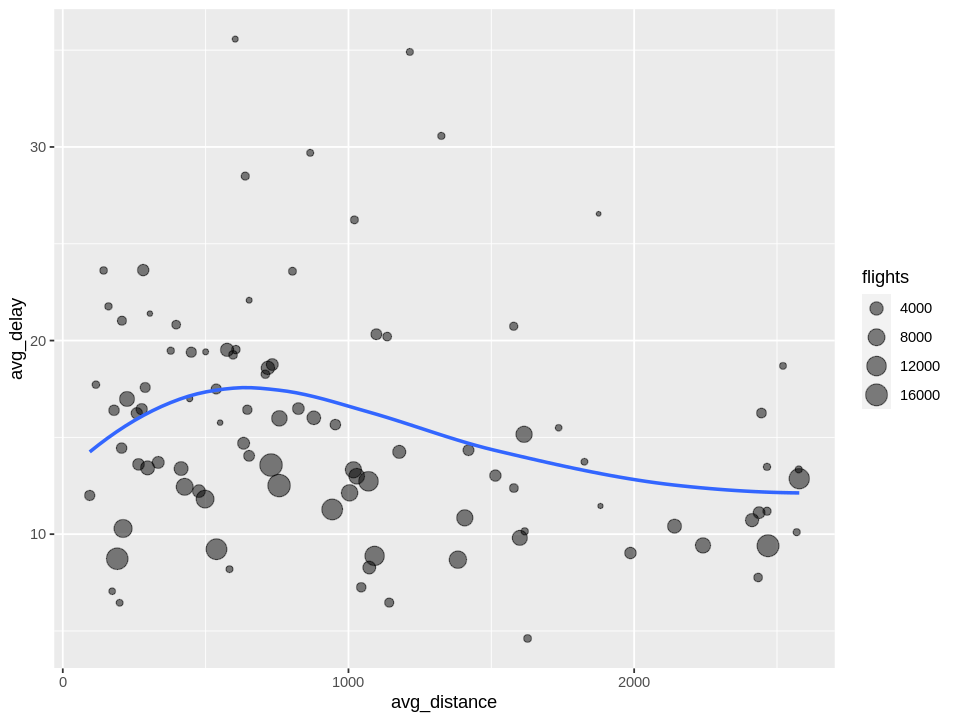

In [33]:
flights_utc %>%
  group_by(dest_faa) %>%
  summarise(
    flights = n(),
    avg_delay = mean(dep_delay, na.rm = TRUE),
    avg_distance = mean(distance, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  filter(flights > 20, dest_faa != "HNL") %>%

  ggplot(aes(avg_distance, avg_delay)) +
  geom_point(aes(size = flights), alpha = .5) +
  geom_smooth(formula = y ~ x, method = "loess", se = FALSE)

> The shape of this plot is very characteristic: whenever you plot a mean (or other summary) versus group size, you’ll see that the variation decreases as the sample size increases.

> When looking at this sort of plot, it’s often useful to filter out the groups with the smallest numbers of observations, so you can see more of the pattern and less of the extreme variation in the smallest groups.

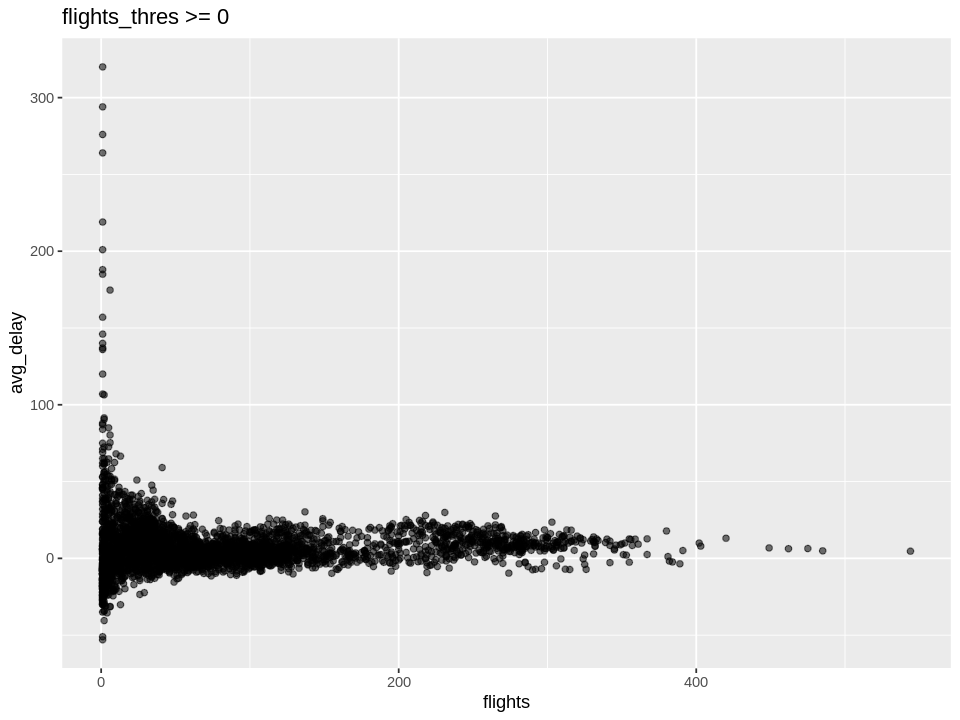

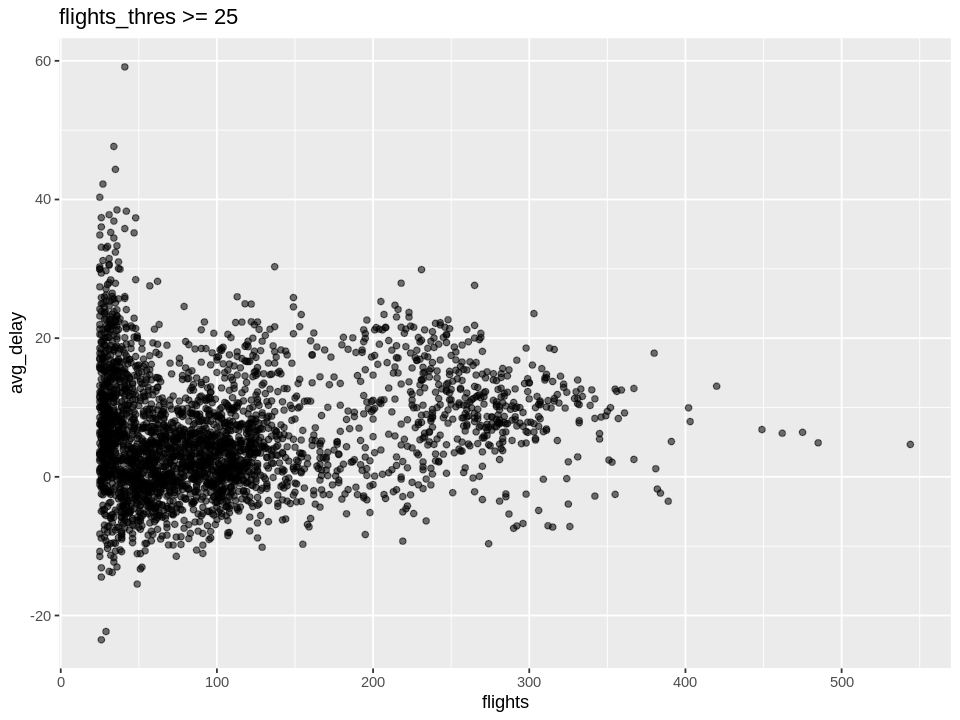

In [34]:
for (flights_thres in c(0, 25)) {
  print(
    flights_utc %>%
      filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
      group_by(tailnum) %>%
      summarise(
        avg_delay = mean(arr_delay),
        flights = n(),
        .groups = "drop"
      ) %>%
      filter(flights >= flights_thres) %>%

      qplot(flights, avg_delay, data = ., geom = "point", alpha = .1, show.legend = FALSE) +
      ggtitle(str_interp("flights_thres >= ${flights_thres}"))
  )
}

In [35]:
summary(Lahman::Batting)
head(Lahman::Batting)
?Lahman::Batting

   playerID             yearID         stint           teamID      lgID      
 Length:107429      Min.   :1871   Min.   :1.000   CHN    : 5013   AA: 1893  
 Class :character   1st Qu.:1936   1st Qu.:1.000   PHI    : 4925   AL:49458  
 Mode  :character   Median :1976   Median :1.000   PIT    : 4871   FL:  472  
                    Mean   :1967   Mean   :1.079   SLN    : 4809   NA:  738  
                    3rd Qu.:2000   3rd Qu.:1.000   CIN    : 4688   NL:54385  
                    Max.   :2019   Max.   :5.000   CLE    : 4644   PL:  149  
                                                   (Other):78479   UA:  334  
       G                AB              R                H         
 Min.   :  1.00   Min.   :  0.0   Min.   :  0.00   Min.   :  0.00  
 1st Qu.: 12.00   1st Qu.:  4.0   1st Qu.:  0.00   1st Qu.:  0.00  
 Median : 34.00   Median : 47.0   Median :  4.00   Median :  8.00  
 Mean   : 51.13   Mean   :140.5   Mean   : 18.64   Mean   : 36.71  
 3rd Qu.: 80.00   3rd Qu.:228.0   3r

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,⋯,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
,<chr>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,abercda01,1871,1,TRO,NA,1,4,0,0,0,⋯,0,0,0,0,0,NA,NA,NA,NA,0
2,addybo01,1871,1,RC1,NA,25,118,30,32,6,⋯,13,8,1,4,0,NA,NA,NA,NA,0
3,allisar01,1871,1,CL1,NA,29,137,28,40,4,⋯,19,3,1,2,5,NA,NA,NA,NA,1
4,allisdo01,1871,1,WS3,NA,27,133,28,44,10,⋯,27,1,1,0,2,NA,NA,NA,NA,0
5,ansonca01,1871,1,RC1,NA,25,120,29,39,11,⋯,16,6,2,2,1,NA,NA,NA,NA,0
6,armstbo01,1871,1,FW1,NA,12,49,9,11,2,⋯,5,0,1,0,1,NA,NA,NA,NA,0


Batting {Lahman},R Documentation


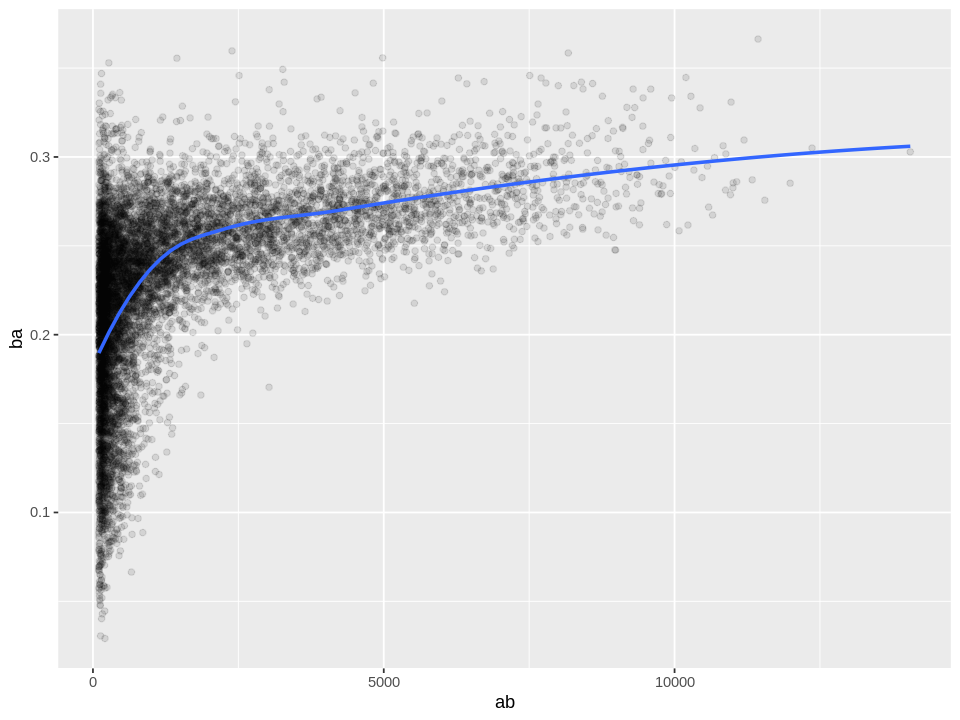

In [36]:
as_tibble(Lahman::Batting) %>%
  group_by(playerID) %>%
  summarise(
    ba = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    ab = sum(AB, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  filter(ab > 100) %>%
  
  ggplot(aes(ab, ba)) +
  geom_point(alpha = .1) +
  geom_smooth(formula = y ~ x, method = "loess", se = FALSE)

> You can find a good explanation of this problem at *http://bit.ly/Bayesbbal* and *http://bit.ly/notsortavg*.

In [37]:
as_tibble(Lahman::Batting) %>%
  group_by(playerID) %>%
  summarise(
    ba = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    ab = sum(AB, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(desc(ba)) %>%
  head(10)

as_tibble(Lahman::Batting) %>%
  group_by(playerID) %>%
  summarise(
    ba = sum(H, na.rm = TRUE) / sum(AB, na.rm = TRUE),
    ab = sum(AB, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  arrange(desc(ba * ab)) %>%
  head(10)

playerID,ba,ab
<chr>,<dbl>,<int>
abramge01,1,1
alanirj01,1,1
alberan01,1,1
banisje01,1,1
bartocl01,1,1
bassdo01,1,1
birasst01,1,2
bruneju01,1,1
burnscb01,1,1


playerID,ba,ab
<chr>,<dbl>,<int>
rosepe01,0.3028535,14053
cobbty01,0.3662994,11436
aaronha01,0.3049984,12364
musiast01,0.3308421,10972
speaktr01,0.3446788,10195
jeterde01,0.3095132,11195
ansonca01,0.3341115,10281
wagneho01,0.3276176,10439
yastrca01,0.2852019,11988


> Useful Summary Functions
>
> *Measures of location*.
>
> *Measures of spread `sd(x)`, `IQR(x)`, `mad(x)`*. The mean squared deviation, or standard deviation or sd for short, is the standard measure of spread. The interquartile range `IQR()` and median absolute deviation `mad(x)` are robust equivalents that may be more useful if you have outliers.
>
> *Measures of rank `min(x)`, `quantile(x, 0.25)`, `max(x)`*.
>
> *Measures of position first(x), nth(x, 2), last(x)*. These work similarly to `x[1]`, `x[2]`, and `x[length(x)]` but let you set a default value if that position does not exist. These functions are complementary to filtering on ranks.
>
> *Counts*. To count the number of non-missing values, use `sum(!is.na(x))`. To count the number of distinct (unique) values, use `n_distinct(x)`. You can optionally provide a `weight` variable.
>
> *Counts and proportions of logical values `sum(x > 10)`, `mean(y == 0)`*. When used with numeric functions, `TRUE` is converted to 1 and `FALSE` to 0.

In [38]:
flights_utc %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  group_by(arr_day = floor_date(arr_time, unit = "day")) %>%
  summarise(
    avg_delay = mean(arr_delay),
    avg_positive_delay = mean(arr_delay[arr_delay > 0]),
    .groups = "drop"
  ) %>%
  print

# A tibble: 367 x 3
   arr_day             avg_delay avg_positive_delay
   <dttm>                  <dbl>              <dbl>
 1 2013-01-01 00:00:00     9.12                28.6
 2 2013-01-02 00:00:00    13.0                 32.3
 3 2013-01-03 00:00:00     8.92                28.5
 4 2013-01-04 00:00:00     1.14                31.6
 5 2013-01-05 00:00:00    -0.439               26.9
 6 2013-01-06 00:00:00     1.24                21.9
 7 2013-01-07 00:00:00    -1.34                26.2
 8 2013-01-08 00:00:00    -3.97                24.0
 9 2013-01-09 00:00:00    -0.598               25.3
10 2013-01-10 00:00:00    -4.06                28.1
# … with 357 more rows


In [39]:
flights_utc %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  group_by(dest_faa) %>%
  summarise(
    distance_median = median(distance),
    distance_mad = mad(distance),
    .groups = "drop"
  ) %>%
  arrange(desc(distance_mad)) %>%
  print

# A tibble: 104 x 3
   dest_faa distance_median distance_mad
   <chr>              <dbl>        <dbl>
 1 CLE                  419         8.90
 2 MCO                  944         8.90
 3 ORF                  290         8.90
 4 RSW                 1074         8.90
 5 CHS                  636         7.41
 6 JAX                  828         7.41
 7 PBI                 1028         7.41
 8 PIT                  335         7.41
 9 TPA                 1005         7.41
10 FLL                 1069         5.93
# … with 94 more rows


In [40]:
flights_utc %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  group_by(dep_day = floor_date(dep_time, unit = "day")) %>%
  summarise(
    dep_time_min = min(dep_time),
    dep_time_max = max(dep_time),
    .groups = "drop"
  ) %>%
  print

# A tibble: 366 x 3
   dep_day             dep_time_min        dep_time_max       
   <dttm>              <dttm>              <dttm>             
 1 2013-01-01 00:00:00 2013-01-01 10:17:00 2013-01-01 23:59:00
 2 2013-01-02 00:00:00 2013-01-02 00:00:00 2013-01-02 23:58:00
 3 2013-01-03 00:00:00 2013-01-03 00:00:00 2013-01-03 23:59:00
 4 2013-01-04 00:00:00 2013-01-04 00:02:00 2013-01-04 23:59:00
 5 2013-01-05 00:00:00 2013-01-05 00:00:00 2013-01-05 23:59:00
 6 2013-01-06 00:00:00 2013-01-06 00:00:00 2013-01-06 23:59:00
 7 2013-01-07 00:00:00 2013-01-07 00:00:00 2013-01-07 23:59:00
 8 2013-01-08 00:00:00 2013-01-08 00:00:00 2013-01-08 23:59:00
 9 2013-01-09 00:00:00 2013-01-09 00:00:00 2013-01-09 23:59:00
10 2013-01-10 00:00:00 2013-01-10 00:00:00 2013-01-10 23:58:00
# … with 356 more rows


In [41]:
flights_utc %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  group_by(dep_day = floor_date(dep_time, unit = "day")) %>%
  summarise(
    dep_time_first = first(dep_time),
    dep_time_last = last(dep_time),
    .groups = "drop"
  ) %>%
  print

# A tibble: 366 x 3
   dep_day             dep_time_first      dep_time_last      
   <dttm>              <dttm>              <dttm>             
 1 2013-01-01 00:00:00 2013-01-01 10:17:00 2013-01-01 23:59:00
 2 2013-01-02 00:00:00 2013-01-02 00:00:00 2013-01-02 23:58:00
 3 2013-01-03 00:00:00 2013-01-03 00:00:00 2013-01-03 23:59:00
 4 2013-01-04 00:00:00 2013-01-04 00:02:00 2013-01-04 23:59:00
 5 2013-01-05 00:00:00 2013-01-05 00:00:00 2013-01-05 23:59:00
 6 2013-01-06 00:00:00 2013-01-06 00:00:00 2013-01-06 23:59:00
 7 2013-01-07 00:00:00 2013-01-07 00:00:00 2013-01-07 23:59:00
 8 2013-01-08 00:00:00 2013-01-08 00:00:00 2013-01-08 23:59:00
 9 2013-01-09 00:00:00 2013-01-09 00:00:00 2013-01-09 23:59:00
10 2013-01-10 00:00:00 2013-01-10 00:00:00 2013-01-10 23:58:00
# … with 356 more rows


In [42]:
flights_utc %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  group_by(dest_faa) %>%
  summarise(
    carriers = n_distinct(carrier),
    .groups = "drop"
  ) %>%
  arrange(desc(carriers)) %>%
  print

# A tibble: 104 x 2
   dest_faa carriers
   <chr>       <int>
 1 ATL             7
 2 BOS             7
 3 CLT             7
 4 ORD             7
 5 TPA             7
 6 AUS             6
 7 DCA             6
 8 DTW             6
 9 IAD             6
10 MSP             6
# … with 94 more rows


In [43]:
flights_utc %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  count(dest_faa) %>%
  arrange(desc(n)) %>%
  print

# A tibble: 104 x 2
   dest_faa     n
   <chr>    <int>
 1 ATL      16837
 2 ORD      16566
 3 LAX      16026
 4 BOS      15022
 5 MCO      13967
 6 CLT      13674
 7 SFO      13173
 8 FLL      11897
 9 MIA      11593
10 DCA       9111
# … with 94 more rows


In [44]:
flights_utc %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  count(tailnum, wt = distance) %>%
  arrange(desc(n)) %>%
  print

# A tibble: 4,037 x 2
   tailnum      n
   <chr>    <dbl>
 1 N328AA  929090
 2 N338AA  921172
 3 N335AA  902271
 4 N327AA  900482
 5 N323AA  839468
 6 N319AA  837924
 7 N336AA  833136
 8 N329AA  825826
 9 N324AA  786159
10 N339AA  783648
# … with 4,027 more rows


In [45]:
flights_utc %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  group_by(arr_day = floor_date(arr_time, unit = "day")) %>%
  summarise(
    prop_delay_gt_hour = mean(arr_delay > 60),
    .groups = "drop"
  ) %>%
  print

# A tibble: 367 x 2
   arr_day             prop_delay_gt_hour
   <dttm>                           <dbl>
 1 2013-01-01 00:00:00             0.0453
 2 2013-01-02 00:00:00             0.0854
 3 2013-01-03 00:00:00             0.0648
 4 2013-01-04 00:00:00             0.0556
 5 2013-01-05 00:00:00             0.0409
 6 2013-01-06 00:00:00             0.0404
 7 2013-01-07 00:00:00             0.0409
 8 2013-01-08 00:00:00             0.0222
 9 2013-01-09 00:00:00             0.0223
10 2013-01-10 00:00:00             0.0198
# … with 357 more rows


> When you group by multiple variables, each summary peels off one level of the grouping. That makes it easy to progressively roll up a dataset. Be careful when progressively rolling up summaries: it’s OK for sums and counts, but you need to think about weighting means and variances, and it’s not possible to do it exactly for rank-based statistics like the median. In other words, the sum of groupwise sums is the overall sum, but the median of groupwise medians is not the overall median.

In [46]:
nycflights13::flights %>%
  group_by(year, month, day) %>%
  summarise(flights = n(), .groups = "drop_last") %T>%
  print %>%
  summarise(flights = sum(flights), .groups = "drop_last") %T>%
  print %>%
  summarise(flights = sum(flights), .groups = "drop_last") %>%
  print

# A tibble: 365 x 4
# Groups:   year, month [12]
    year month   day flights
   <int> <int> <int>   <int>
 1  2013     1     1     842
 2  2013     1     2     943
 3  2013     1     3     914
 4  2013     1     4     915
 5  2013     1     5     720
 6  2013     1     6     832
 7  2013     1     7     933
 8  2013     1     8     899
 9  2013     1     9     902
10  2013     1    10     932
# … with 355 more rows
# A tibble: 12 x 3
# Groups:   year [1]
    year month flights
   <int> <int>   <int>
 1  2013     1   27004
 2  2013     2   24951
 3  2013     3   28834
 4  2013     4   28330
 5  2013     5   28796
 6  2013     6   28243
 7  2013     7   29425
 8  2013     8   29327
 9  2013     9   27574
10  2013    10   28889
11  2013    11   27268
12  2013    12   28135
# A tibble: 1 x 2
   year flights
  <int>   <int>
1  2013  336776


In [47]:
flights_utc %>%
  group_by(dep_day = floor_date(dep_time, unit = "day")) %>%
  summarise(flights = n(), .groups = "drop") %>%
  print

flights_utc %>%
  group_by(dep_day = floor_date(dep_time, unit = "day")) %>%
  summarise(flights = n(), .groups = "keep") %>%
  ungroup() %>%
  print

# A tibble: 367 x 2
   dep_day             flights
   <dttm>                <int>
 1 2013-01-01 00:00:00     695
 2 2013-01-02 00:00:00     922
 3 2013-01-03 00:00:00     907
 4 2013-01-04 00:00:00     913
 5 2013-01-05 00:00:00     768
 6 2013-01-06 00:00:00     788
 7 2013-01-07 00:00:00     928
 8 2013-01-08 00:00:00     907
 9 2013-01-09 00:00:00     904
10 2013-01-10 00:00:00     918
# … with 357 more rows
# A tibble: 367 x 2
   dep_day             flights
   <dttm>                <int>
 1 2013-01-01 00:00:00     695
 2 2013-01-02 00:00:00     922
 3 2013-01-03 00:00:00     907
 4 2013-01-04 00:00:00     913
 5 2013-01-05 00:00:00     768
 6 2013-01-06 00:00:00     788
 7 2013-01-07 00:00:00     928
 8 2013-01-08 00:00:00     907
 9 2013-01-09 00:00:00     904
10 2013-01-10 00:00:00     918
# … with 357 more rows


### Exercises

1. Brainstorm at least five different ways to assess the typical delay characteristics of a group of flights. Consider the following scenarios:
    1. A flight is 15 minutes early 50% of the time, and 15 minutes late 50% of the time.
    1. A flight is always 10 minutes late.
    1. A flight is 30 minutes early 50% of the time, and 30 minutes late 50% of the time.
    1. 99% of the time a flight is on time. 1% of the time it’s 2 hours late.

    Which is more important: arrival delay or departure delay?

1. Come up with another approach that will give you the same output as `not_cancelled %>% count(dest)` and `not_cancelled %>% count(tailnum, wt = distance)` (without using `count()`).
1. Our definition of cancelled flights (`is.na(dep_delay) | is.na(arr_delay)`) is slightly suboptimal. Why? Which is the most important column?
1. Look at the number of cancelled flights per day. Is there a pattern? Is the proportion of cancelled flights related to the average delay?
1. Which carrier has the worst delays? Challenge: can you disentangle the effects of bad airports versus bad carriers? Why/why not? (Hint: think about `flights %>% group_by(carrier, dest) %>% summarize(n())`.)
1. For each plane, count the number of flights before the first delay of greater than 1 hour.
1. What does the sort argument to `count()` do? When might you use it?

In [48]:
# 6.
flights_utc %>%
  group_by(tailnum) %>%
  count(z = cumsum(dminutes(coalesce(dep_delay, 0)) > dhours()) == 0) %>%
  select(-z) %>%
  arrange(desc(n)) %>%
  head(10)

tailnum,n
<chr>,<int>
NA,2512
N725MQ,559
N723MQ,484
N713MQ,480
N722MQ,467
N711MQ,442
N258JB,420
N351JB,393
N298JB,391


## Grouped Mutates (and Filters)

In [49]:
flights_utc %>%
  select(matches("air|^arr_time|delay|distance")) %>%
  filter(!is.na(arr_delay), !is.na(dep_delay)) %>%
  group_by(arr_day = floor_date(arr_time, unit = "day")) %>%
  filter(rank(desc(arr_delay)) < 10) %>%
  print

# A tibble: 3,321 x 6
# Groups:   arr_day [367]
   air_time arr_delay arr_time            dep_delay distance arr_day            
      <dbl>     <dbl> <dttm>                  <dbl>    <dbl> <dttm>             
 1      118       137 2013-01-01 16:47:00       101      544 2013-01-01 00:00:00
 2       41       851 2013-01-01 16:01:00       853      184 2013-01-01 00:00:00
 3       37       123 2013-01-01 16:56:00       144      200 2013-01-01 00:00:00
 4      248       145 2013-01-01 20:47:00       134     1416 2013-01-01 00:00:00
 5       63       127 2013-01-01 22:38:00       115      277 2013-01-01 00:00:00
 6       53       123 2013-01-01 23:18:00       119      228 2013-01-01 00:00:00
 7      213       338 2013-01-02 03:20:00       290     1134 2013-01-02 00:00:00
 8       46       263 2013-01-02 01:58:00       260      266 2013-01-02 00:00:00
 9       60       174 2013-01-02 03:24:00       157      213 2013-01-02 00:00:00
10      121       222 2013-01-02 04:30:00       216      708 

In [50]:
flights_utc %>%
  group_by(dest_faa) %>%
  filter(n() > 365) %>%
  ungroup() %>%
  print

# A tibble: 332,577 x 16
   air_time arr_delay arr_time            carrier carrier_name dep_delay
      <dbl>     <dbl> <dttm>              <chr>   <chr>            <dbl>
 1      227        11 2013-01-01 14:30:00 UA      United Air …         2
 2      227        20 2013-01-01 14:50:00 UA      United Air …         4
 3      160        33 2013-01-01 15:23:00 AA      American Ai…         2
 4      183       -18 2013-01-01 16:04:00 B6      JetBlue Air…        -1
 5      116       -25 2013-01-01 14:12:00 DL      Delta Air L…        -6
 6      150        12 2013-01-01 13:40:00 UA      United Air …        -4
 7      158        19 2013-01-01 15:13:00 B6      JetBlue Air…        -5
 8       53       -14 2013-01-01 13:09:00 EV      ExpressJet …        -3
 9      140        -8 2013-01-01 14:38:00 B6      JetBlue Air…        -3
10      138         8 2013-01-01 13:53:00 AA      American Ai…        -2
# … with 332,567 more rows, and 10 more variables: dep_time <dttm>,
#   dest_faa <chr>, dest_name <

In [51]:
flights_utc %>%
  group_by(dest_faa) %>%
  filter(n() > 365) %>%
  ungroup() %>%
  filter(arr_delay > 0) %>%
  mutate(prop_delay = arr_delay / sum(arr_delay)) %>%
  select(arr_time, dest_faa, arr_delay, prop_delay) %>%
  print

# A tibble: 131,106 x 4
   arr_time            dest_faa arr_delay prop_delay
   <dttm>              <chr>        <dbl>      <dbl>
 1 2013-01-01 14:30:00 IAH             11 0.00000208
 2 2013-01-01 14:50:00 IAH             20 0.00000379
 3 2013-01-01 15:23:00 MIA             33 0.00000625
 4 2013-01-01 13:40:00 ORD             12 0.00000227
 5 2013-01-01 15:13:00 FLL             19 0.00000360
 6 2013-01-01 13:53:00 ORD              8 0.00000151
 7 2013-01-01 15:24:00 LAX              7 0.00000133
 8 2013-01-01 15:41:00 DFW             31 0.00000587
 9 2013-01-01 14:37:00 ATL             12 0.00000227
10 2013-01-01 14:21:00 DTW             16 0.00000303
# … with 131,096 more rows


### Exercises

1. Refer back to the table of useful mutate and filtering functions. Describe how each operation changes when you combine it with grouping.
1. Which plane (`tailnum`) has the worst on-time record?
1. What time of day should you fly if you want to avoid delays as much as possible?
1. For each destination, compute the total minutes of delay. For each flight, compute the proportion of the total delay for its destination.
1. Delays are typically temporally correlated: even once the problem that caused the initial delay has been resolved, later flights are delayed to allow earlier flights to leave. Using `lag()` explores how the delay of a flight is related to the delay of the immediately preceding flight.
1. Look at each destination. Can you find flights that are suspiciously fast? (That is, flights that represent a potential data entry error.) Compute the air time of a flight relative to the shortest flight to that destination. Which flights were most delayed in the air?
1. Find all destinations that are flown by at least two carriers. Use that information to rank the carriers.

In [52]:
# 2.
flights_utc %>%
  group_by(tailnum) %>%
  transmute(median_arr_delay = median(arr_delay, na.rm = TRUE)) %>%
  arrange(desc(median_arr_delay)) %>%
  head(10)

tailnum,median_arr_delay
<chr>,<dbl>
N844MH,320
N911DA,294
N922EV,276
N587NW,264
N851NW,219
N928DN,201
N7715E,188
N654UA,185
N427SW,157


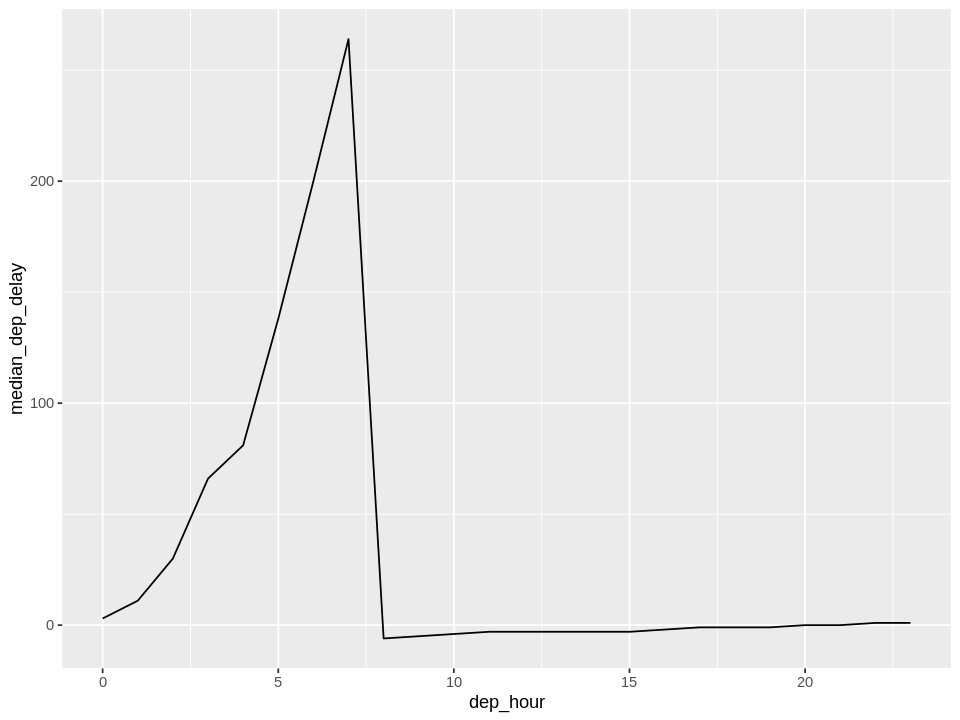

In [53]:
# 3.
flights_utc %>%
  filter(!is.na(dep_delay)) %>%
  group_by(dep_hour = hour(dep_time)) %>%
  summarise(median_dep_delay = median(dep_delay), .groups = "drop") %>%
  qplot(dep_hour, median_dep_delay, data = ., geom = "line")

> Functions that work most naturally in grouped mutates and filters are known as window functions (versus the summary functions used for summaries). You can learn more about useful window functions in the corresponding vignette: `vignette("window-functions")`.